In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
ages = np.array([15, 20, 20, 25, 30, 35, 40])
ages = np.hstack((np.array([1000, 1000, 1000]), np.arange(5, 101, 5)))

# np.random.shuffle(ages)
ages

array([1000, 1000, 1000,    5,   10,   15,   20,   25,   30,   35,   40,
         45,   50,   55,   60,   65,   70,   75,   80,   85,   90,   95,
        100])

Mean – average value  
Median – middle value (sorted)  
Mode – most frequent value  
Variance – average squared distance from mean  
Std Dev – spread, square root of variance

In [71]:
mean = np.mean(ages)
median = np.median(ages)
mode = np.argmax(np.bincount(ages))
variance = np.var(ages)
std_dev = np.std(ages)

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 176.09
Median: 60.00
Mode: 1000.00
Variance: 102547.73
Standard Deviation: 320.23


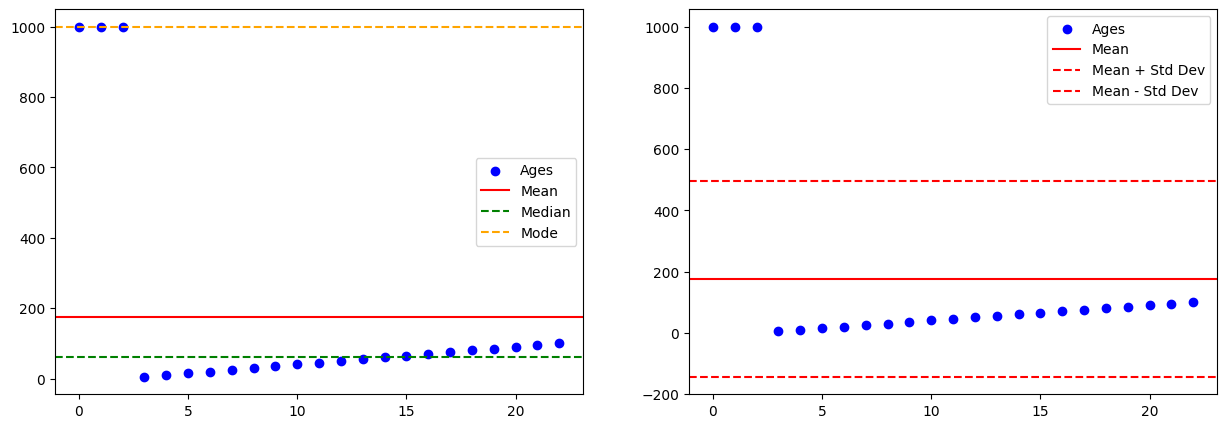

In [72]:
def plot_stats():
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  # First plot
  ax1.scatter(range(len(ages)), ages, label='Ages', color='blue')
  ax1.axhline(mean, color='red', label='Mean')
  ax1.axhline(median, color='green', linestyle='--', label='Median')
  ax1.axhline(mode, color='orange', linestyle='--', label='Mode')
  ax1.legend()

  # Second plot
  ax2.scatter(range(len(ages)), ages, label='Ages', color='blue')
  ax2.axhline(mean, color='red', label='Mean')
  ax2.axhline(mean + std_dev, color='red', linestyle='--', label='Mean + Std Dev')
  ax2.axhline(mean - std_dev, color='red', linestyle='--', label='Mean - Std Dev')
  # ax2.axhline(mean + variance, color='green', linestyle='--', label='Mean + Variance')
  # ax2.axhline(mean - variance, color='green', linestyle='--', label='Mean - Variance')
  ax2.legend()


plot_stats()

## Sum Squared Residuals - shows total prediction error

Residual = actual value minus predicted value  
Prediction = whatever we predicted  
Sum Squared Residuals = how wrong we were (add all squared residuals)  
Mean Squared Error (MSE) = average of squared residuals

In [73]:
ages_actual = np.array([15, 20, 25])
ages_predicted = np.array([12, 22, 28])

ages_actual = np.array([15, 20, 20, 20, 25, 30, 35, 40, 40, 45, 50])
ages_predicted = np.array([12, 22, 28, 20, 30, 35, 40, 35, 40, 45, 30])

# ages_predicted = np.array([np.mean(ages_actual)] * len(ages_actual))

In [74]:
residuals = ages_actual - ages_predicted
squared_residuals = residuals ** 2
sum_squared_residuals = np.sum(squared_residuals)
mean_squared_error = np.mean(squared_residuals)

print(f"Residuals: {residuals}")
print(f"Squared Residuals: {squared_residuals}")
print(f"Sum of Squared Residuals: {sum_squared_residuals:.2f}")
print(f"Mean Squared Error: {mean_squared_error:.2f}")

Residuals: [ 3 -2 -8  0 -5 -5 -5  5  0  0 20]
Squared Residuals: [  9   4  64   0  25  25  25  25   0   0 400]
Sum of Squared Residuals: 577.00
Mean Squared Error: 52.45


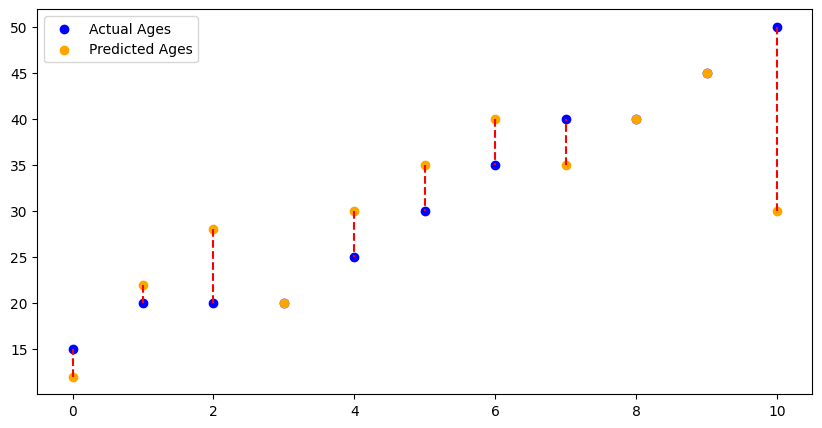

In [75]:
def plot_residuals():
  plt.figure(figsize=(10, 5))

  # Plotting the actual vs predicted values
  plt.scatter(range(len(ages_actual)), ages_actual, label='Actual Ages', color='blue')
  plt.scatter(range(len(ages_predicted)), ages_predicted, label='Predicted Ages', color='orange')

  # Plotting the residuals
  for i in range(len(ages_actual)):
    plt.plot([i, i], [ages_predicted[i], ages_actual[i]], color='red', linestyle='--')

  plt.legend()


plot_residuals()

# Fitting a Line to Data

In [76]:
data = np.array([
    [1, 18],
    [3, 34],
    [4, 56],
    [7, 68],
    [8, 80],
])

# np.random.seed(42)  # for reproducibility
# base_x = np.linspace(1, 8, 20)  # 20 evenly spaced x values
# base_y = 10 * base_x + 8  # linear trend
# noise = np.random.normal(0, 5, 20)  # random noise
# data = np.column_stack((base_x, base_y + noise))  # combine x and y with noise

x = data.T[0]  # study hours
y = data.T[1]  # exam scores

Slope = how much y changes for 1 unit change in x  
Intercept = y value when x is 0 (starting point)

In [77]:
slope, intercept = np.polyfit(x, y, deg=1)

print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")
print(f"Equation: y = {slope:.2f} * x + {intercept:.2f}")

Slope: 8.51, Intercept: 12.07
Equation: y = 8.51 * x + 12.07


RMSE = average size of errors  
Tells how far predictions are from actual values (on average)  
Lower RMSE → better fit  

In [78]:
y_predicted = slope * x + intercept

# print(f"Actual y: {y}")
# print(f"Predicted y: {y_predicted}")
print(f"RMSE: {np.sqrt(np.mean((y - y_predicted) ** 2)):.2f}")

RMSE: 5.11


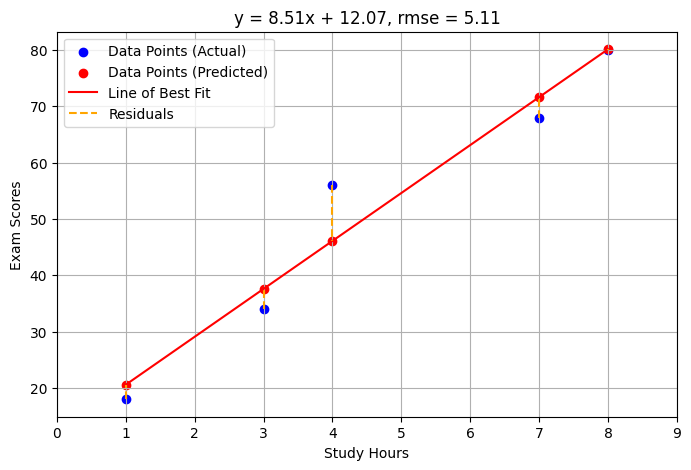

In [79]:
def plot_data():
  plt.figure(figsize=(8, 5))
  plt.scatter(x, y, label='Data Points (Actual)', color='b')
  plt.scatter(x, y_predicted, label='Data Points (Predicted)', color='r')
  plt.plot(x, y_predicted, label='Line of Best Fit', color='r')

  for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_predicted[i]], color='orange', linestyle='--', label='Residuals' if i == 0 else "")

  plt.xlabel('Study Hours')
  plt.ylabel('Exam Scores')
  plt.title(
      f'y = {slope:.2f}x + {intercept:.2f}, rmse = {np.sqrt(np.mean((y - y_predicted) ** 2)):.2f}')
  plt.legend()
  plt.grid()
  plt.xlim(0, max(x) + 1)


plot_data()

# Brute force line fitting

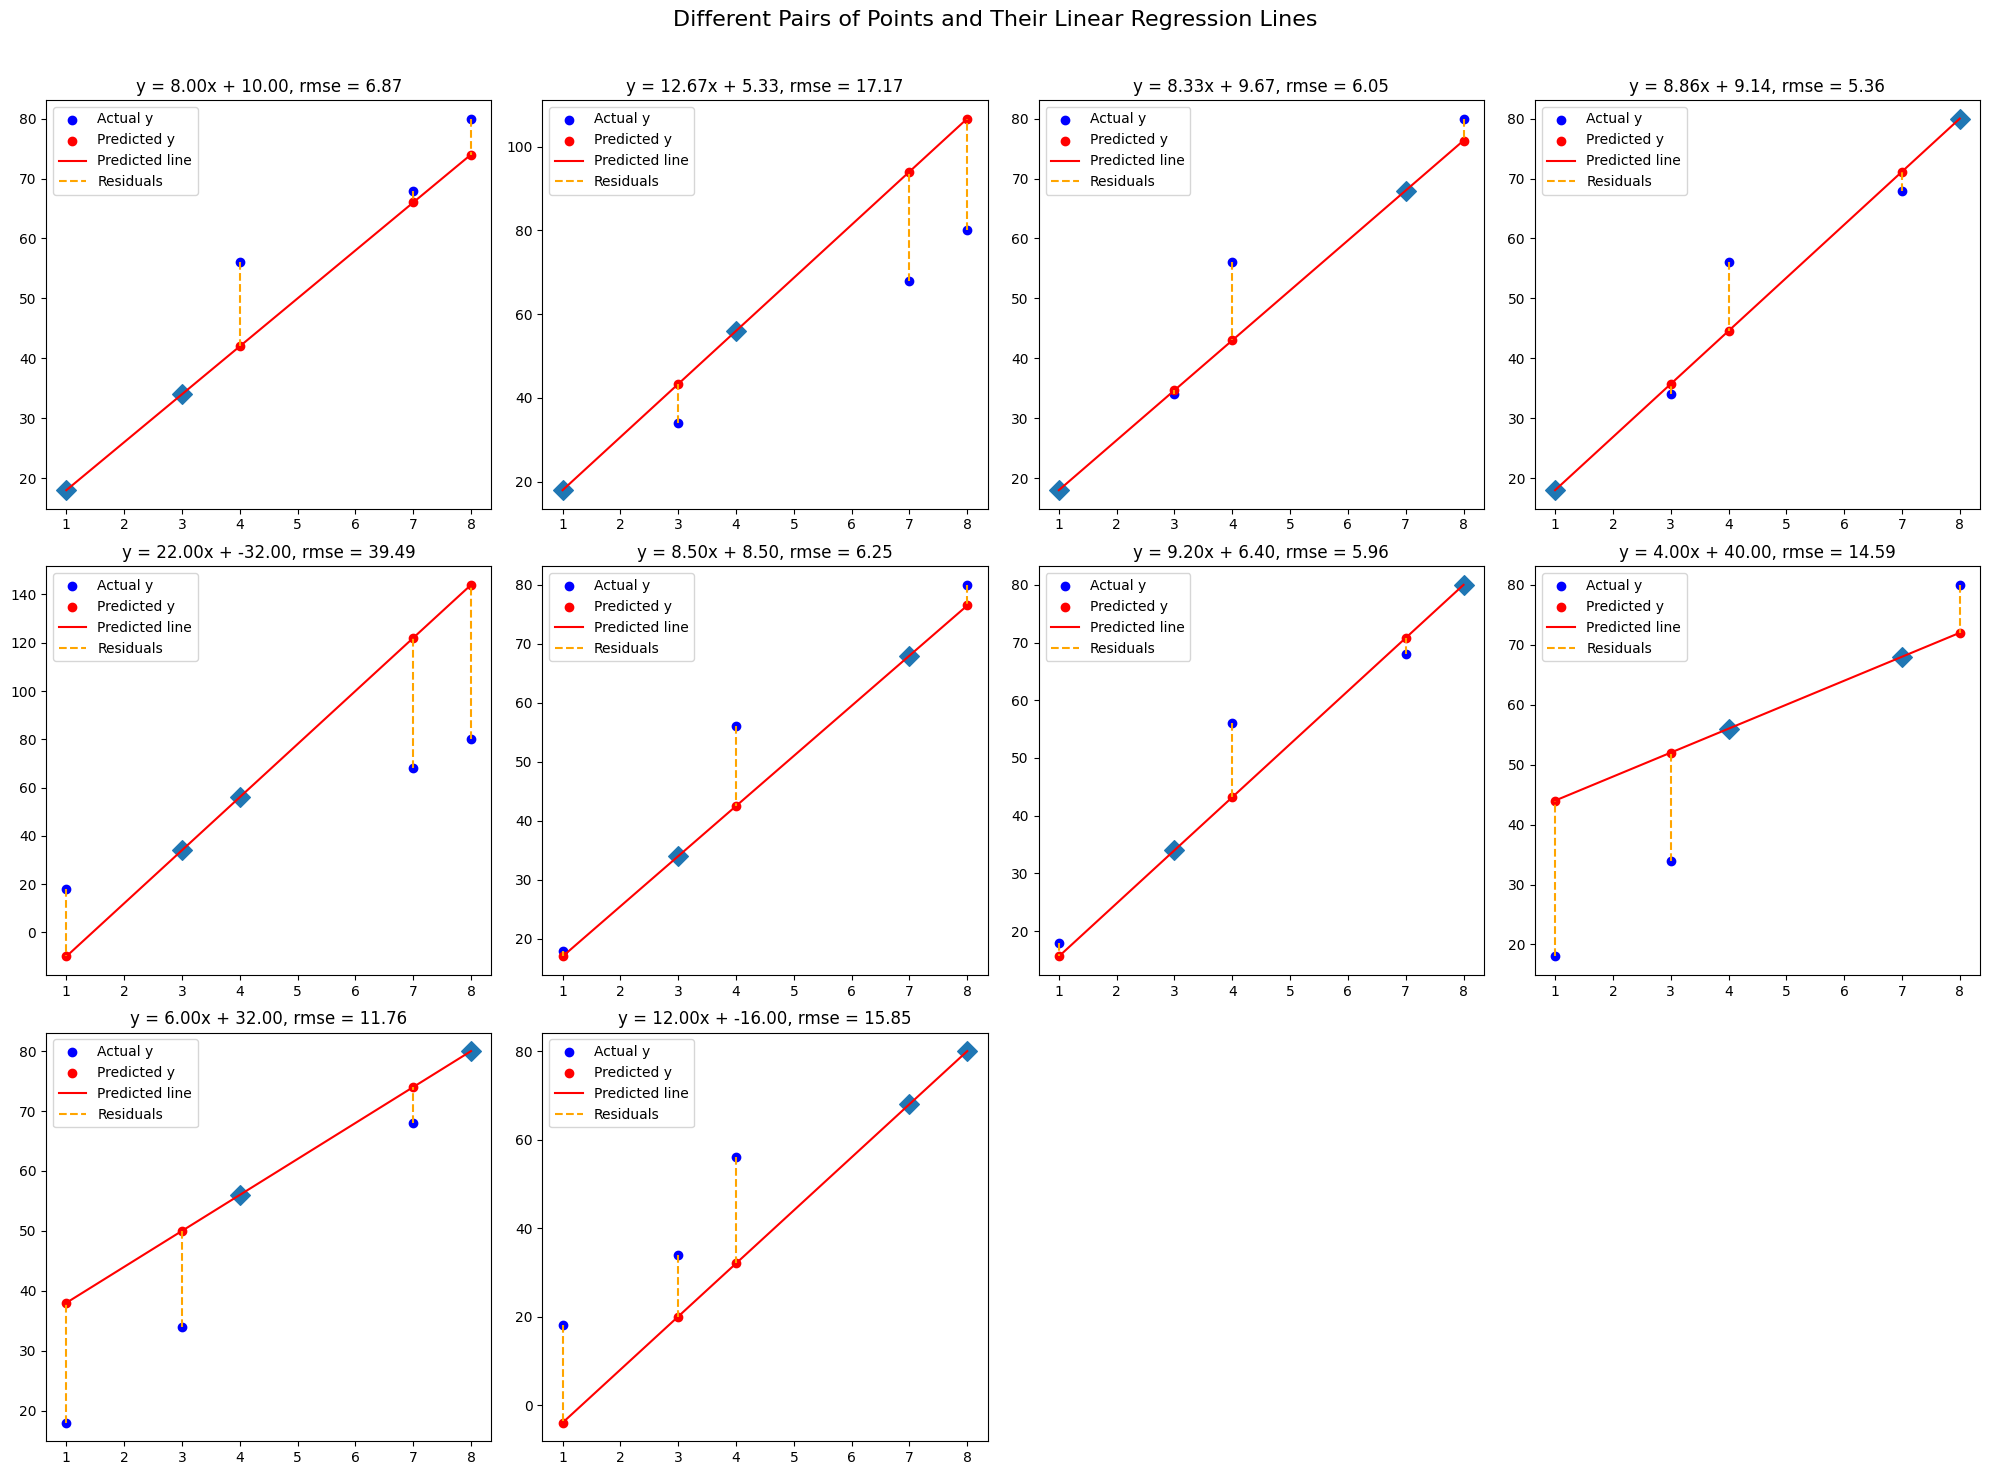

In [80]:
def plot_lines():
  import math
  import itertools

  pairs = list(itertools.combinations(range(len(x)), 2))
  n_cols = 4
  n_rows = math.ceil(len(pairs) / n_cols)

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
  axes = axes.flatten()

  for ax, (i, j) in zip(axes, pairs):
    x1, y1 = x[i], y[i]
    x2, y2 = x[j], y[j]
    if x2 - x1 != 0:
      slope_val = (y2 - y1) / (x2 - x1)
      intercept_val = y1 - slope_val * x1
      y_pred = slope_val * x + intercept_val
      ax.scatter(x, y, color='blue', label='Actual y')
      ax.scatter(x, y_pred, color='red', label='Predicted y')
      ax.scatter([x1, x2], [y1, y2], marker='D', s=100)
      ax.plot(x, y_pred, color='red', label='Predicted line')

      for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='orange',
                linestyle='--', label='Residuals' if i == 0 else "")

      rmse = np.sqrt(np.mean((y - (slope_val * x + intercept_val))**2))
      ax.set_title(f"y = {slope_val:.2f}x + {intercept_val:.2f}, rmse = {rmse:.2f}")
      ax.legend()

  # Hide any unused subplots
  for ax in axes[len(pairs):]:
    ax.set_visible(False)

  plt.tight_layout()
  plt.suptitle("Different Pairs of Points and Their Linear Regression Lines", fontsize=16)
  plt.subplots_adjust(top=0.92)  # Adjust the top to make room for the title


plot_lines()

Line Fit Search

- Make all point pairs → get slope & intercept for each  
- Compute avg ± std for slope & intercept → define search range  
- Create grid of 100×100 slope–intercept combinations  
- For each combo, calculate predictions → get SSR  
- Find combo with minimum SSR → best fit line  
- Plot (slope, intercept, SSR) in 3D → SSR minima shows best fit

Slope (mean ± std): 9.96 ± 4.67, Intercept (mean ± std): 7.30 ± 19.47
Slope range: [5.29, 14.63], Intercept range: [-12.16, 26.77]
Total slopes: 10, Total intercepts: 10, Total pairs: 100
Best Slope: 8.40, Best Intercept: 13.79
Best SSR: 138.63
Best RMSE: 5.27


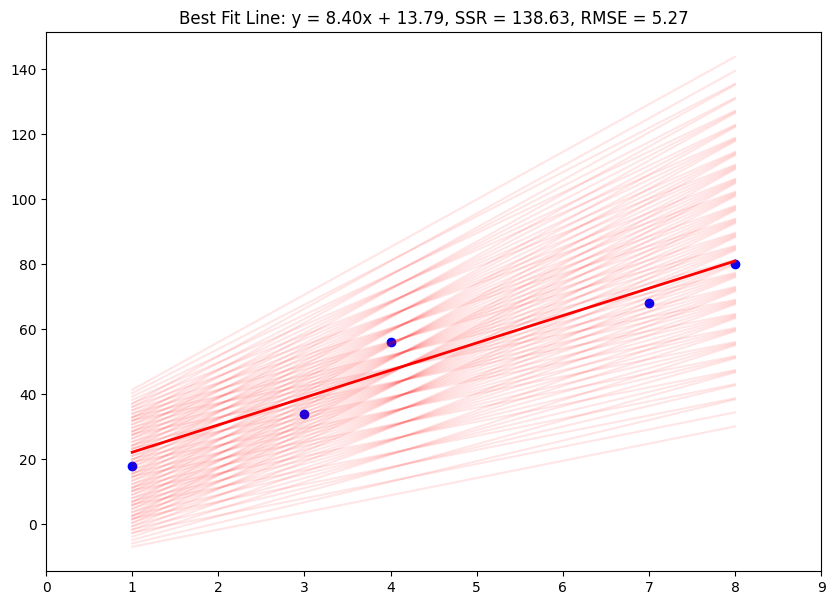

In [81]:
def plot_3d():
  import plotly.express as px

  slopes_ = []
  intercepts_ = []

  for i_idx in range(len(x)):
    for j_idx in range(i_idx + 1, len(x)):
      dx = x[j_idx] - x[i_idx]
      if dx != 0:
        slope_val = (y[j_idx] - y[i_idx]) / dx
        intercept_val = y[i_idx] - slope_val * x[i_idx]

        slopes_.append(slope_val)
        intercepts_.append(intercept_val)

  avg_slope = np.mean(slopes_)
  avg_intercept = np.mean(intercepts_)
  std_slope = np.std(slopes_)
  std_intercept = np.std(intercepts_)

  steps = 10
  slopes_ = np.linspace(avg_slope - std_slope, avg_slope + std_slope, steps)
  intercepts_ = np.linspace(avg_intercept - std_intercept, avg_intercept + std_intercept, steps)

  slopes = []
  intercepts = []
  ssrs = []

  plt.figure(figsize=(10, 7))
  plt.scatter(x, y, color='blue')
  for slope_val in slopes_:
    for intercept_val in intercepts_:
      y_pred = slope_val * x + intercept_val
      ssr = np.sum((y - y_pred) ** 2)
      slopes.append(slope_val)
      intercepts.append(intercept_val)
      ssrs.append(ssr)
      plt.plot(x, y_pred, color='red', alpha=0.1)

  fig = px.scatter_3d(
      x=slopes,
      y=intercepts,
      z=ssrs,
      color=ssrs,
      labels={'x': 'Slope', 'y': 'Intercept', 'z': 'SSR'},
      title="3D Interactive Plot: Slope (x), Intercept (y), SSR (z)"
  )

  best_idx = np.argmin(ssrs)
  best_slope = slopes[best_idx]
  best_intercept = intercepts[best_idx]

  y_pred = best_slope * x + best_intercept
  plt.plot(x, y_pred, color='r', linewidth=2)
  plt.title(
      f"Best Fit Line: y = {best_slope:.2f}x + {best_intercept:.2f}, SSR = {ssrs[best_idx]:.2f}, RMSE = {np.sqrt(ssrs[best_idx] / len(x)):.2f}")
  plt.xlim(0, max(x) + 1)

  print(
      f"Slope (mean ± std): {avg_slope:.2f} ± {std_slope:.2f}, Intercept (mean ± std): {avg_intercept:.2f} ± {std_intercept:.2f}")
  print(
      f"Slope range: [{slopes_[0]:.2f}, {slopes_[-1]:.2f}], Intercept range: [{intercepts_[0]:.2f}, {intercepts_[-1]:.2f}]")
  print(
      f"Total slopes: {len(slopes_)}, Total intercepts: {len(intercepts_)}, Total pairs: {len(slopes_) * len(intercepts_)}")

  print(f"Best Slope: {best_slope:.2f}, Best Intercept: {best_intercept:.2f}")
  print(f"Best SSR: {ssrs[best_idx]:.2f}")
  print(f"Best RMSE: {np.sqrt(ssrs[best_idx] / len(x)):.2f}")

  plt.show()
  fig.show()


plot_3d()